In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"Public Debt (Ksh Million).csv")
df.head()

,Year,Month,Domestic Debt,External Debt,Total
0,2021,December,"4,032,368.18","4,174,371.53","8,206,739.71"
1,2021,November,"4,008,077.30","4,109,282.85","8,117,360.15"
2,2021,October,"3,959,523.30","4,083,124.54","8,042,647.84"
3,2021,September,"3,937,777.45","4,062,504.78","8,000,282.23"
4,2021,August,"3,864,875.78","4,054,862.85","7,919,738.63"


In [3]:
df.shape

(262, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           262 non-null    int64 
 1   Month          262 non-null    object
 2   Domestic Debt  262 non-null    object
 3   External Debt  262 non-null    object
 4   Total          262 non-null    object
dtypes: int64(1), object(4)
memory usage: 10.4+ KB


In [5]:
df.isnull().sum()

Year             0
Month            0
Domestic Debt    0
External Debt    0
Total            0
dtype: int64

In [6]:
#converting the domestic debt, external debt and total columns into floats
for col in ['Domestic Debt', 'External Debt', 'Total']:
    df[col] = df[col].str.replace(',' , '').astype(float) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           262 non-null    int64  
 1   Month          262 non-null    object 
 2   Domestic Debt  262 non-null    float64
 3   External Debt  262 non-null    float64
 4   Total          262 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 10.4+ KB


In [8]:
df[['Domestic Debt', 'External Debt', 'Total']].describe().T

,count,mean,std,min,25%,50%,75%,max
Domestic Debt,262.0,1.166927e+06,1.058535e+06,183417.0,326235.3925,732828.915,1813763.285,4032368.18
External Debt,262.0,1.213153e+06,1.104623e+06,311953.0,417575.2700,623002.505,1801866.320,4174371.53
Total,262.0,2.380080e+06,2.159117e+06,502253.0,751207.2000,1361436.530,3615629.605,8206739.71


In [9]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format = '%Y-%B')

In [10]:
df

,Year,Month,Domestic Debt,External Debt,Total,Date
0,2021,December,4032368.18,4174371.53,8206739.71,2021-12-01
1,2021,November,4008077.30,4109282.85,8117360.15,2021-11-01
2,2021,October,3959523.30,4083124.54,8042647.84,2021-10-01
3,2021,September,3937777.45,4062504.78,8000282.23,2021-09-01
4,2021,August,3864875.78,4054862.85,7919738.63,2021-08-01
...,...,...,...,...,...,...
257,2000,July,202362.00,394667.37,597029.37,2000-07-01
258,2000,June,206127.00,395694.00,601821.00,2000-06-01
259,2000,March,201463.22,396800.00,598263.22,2000-03-01
260,1999,December,190300.00,311953.00,502253.00,1999-12-01


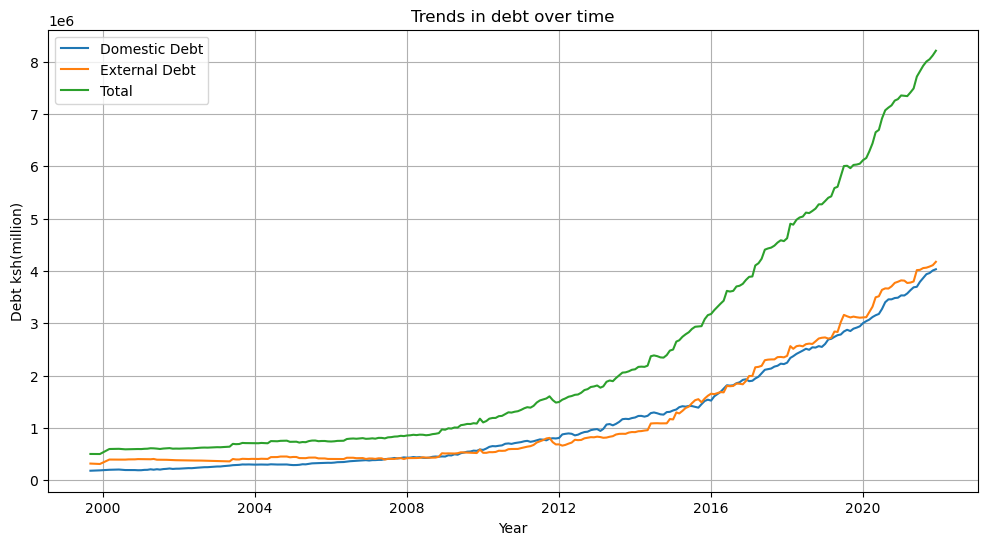

In [11]:
#trend analysis
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Domestic Debt'], label = 'Domestic Debt')
plt.plot(df['Date'], df['External Debt'], label = 'External Debt')
plt.plot(df['Date'], df['Total'], label = 'Total')
plt.title('Trends in debt over time')
plt.ylabel('Debt ksh(million)')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# year over year growth rates
df['Domestic Debt YoY Growth Rate'] = df['Domestic Debt'].pct_change(12)*100
df['External Debt YoY Growth Rate'] = df['External Debt'].pct_change(12)*100
df['Total Debt YoY Growth Rate'] = df['Total'].pct_change(12)*100

In [13]:
df

,Year,Month,Domestic Debt,External Debt,Total,Date,Domestic Debt YoY Growth Rate,External Debt YoY Growth Rate,Total Debt YoY Growth Rate
0,2021,December,4032368.18,4174371.53,8206739.71,2021-12-01,NaN,NaN,NaN
1,2021,November,4008077.30,4109282.85,8117360.15,2021-11-01,NaN,NaN,NaN
2,2021,October,3959523.30,4083124.54,8042647.84,2021-10-01,NaN,NaN,NaN
3,2021,September,3937777.45,4062504.78,8000282.23,2021-09-01,NaN,NaN,NaN
4,2021,August,3864875.78,4054862.85,7919738.63,2021-08-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
257,2000,July,202362.00,394667.37,597029.37,2000-07-01,-1.292607,0.298866,-0.246279
258,2000,June,206127.00,395694.00,601821.00,2000-06-01,-2.684260,0.435557,-0.655276
259,2000,March,201463.22,396800.00,598263.22,2000-03-01,-0.698765,-2.769082,-2.081618
260,1999,December,190300.00,311953.00,502253.00,1999-12-01,-9.631162,-22.459220,-18.051656


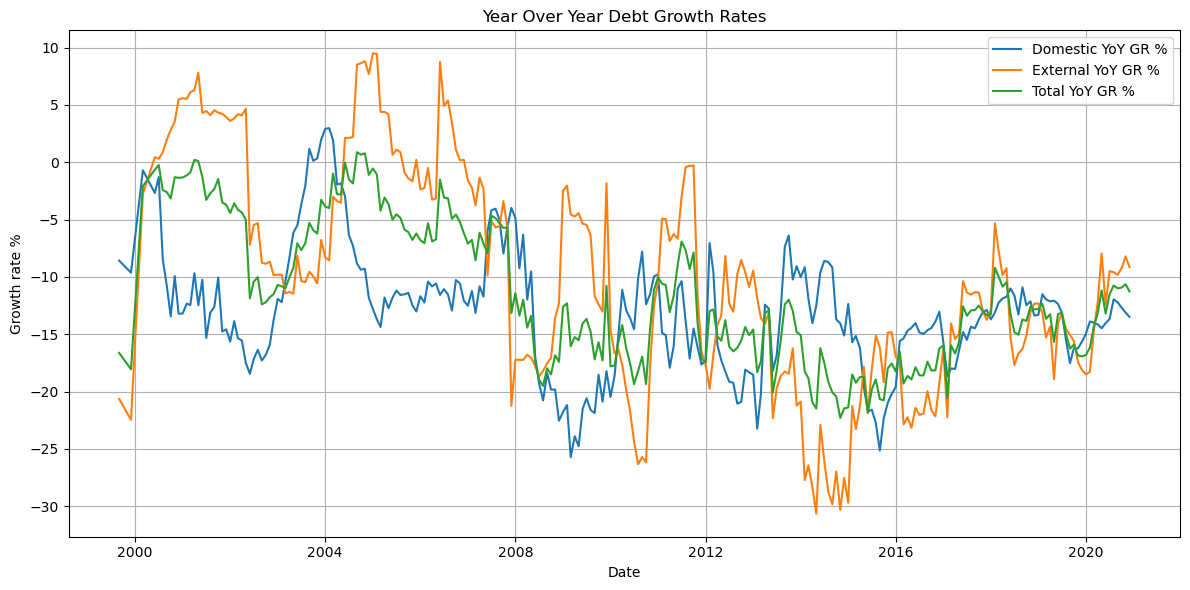

In [14]:
# plotting the year over year growth rates
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Domestic Debt YoY Growth Rate'], label = 'Domestic YoY GR %')
plt.plot(df['Date'], df['External Debt YoY Growth Rate'], label = 'External YoY GR %')
plt.plot(df['Date'], df['Total Debt YoY Growth Rate'], label = 'Total YoY GR %')
plt.title('Year Over Year Debt Growth Rates')
plt.xlabel('Date')
plt.ylabel('Growth rate %')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
#seasonal decomposition on debts
from statsmodels.tsa.seasonal import seasonal_decompose

result_domestic = seasonal_decompose(df['Domestic Debt'], model = 'additive', period = 12)

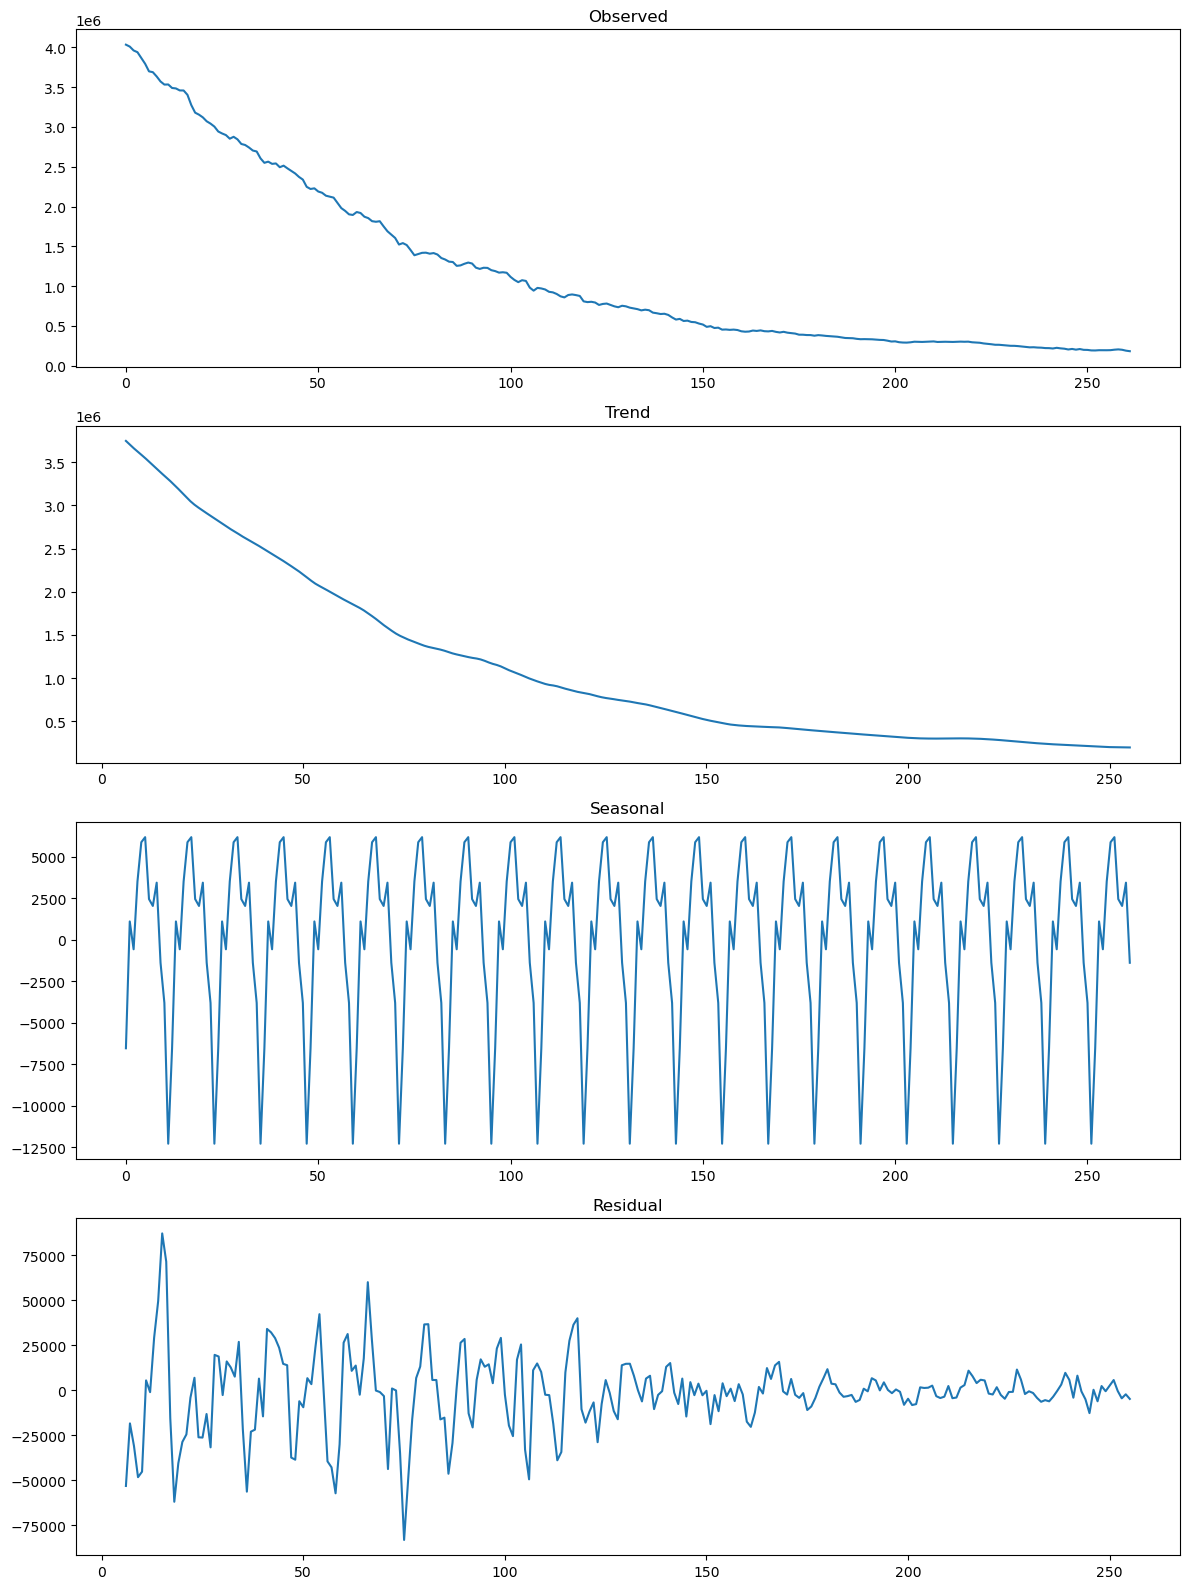

In [21]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
result_domestic.observed.plot(ax=ax1)
ax1.set_title('Observed')
result_domestic.trend.plot(ax=ax2)
ax2.set_title('Trend')
result_domestic.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result_domestic.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

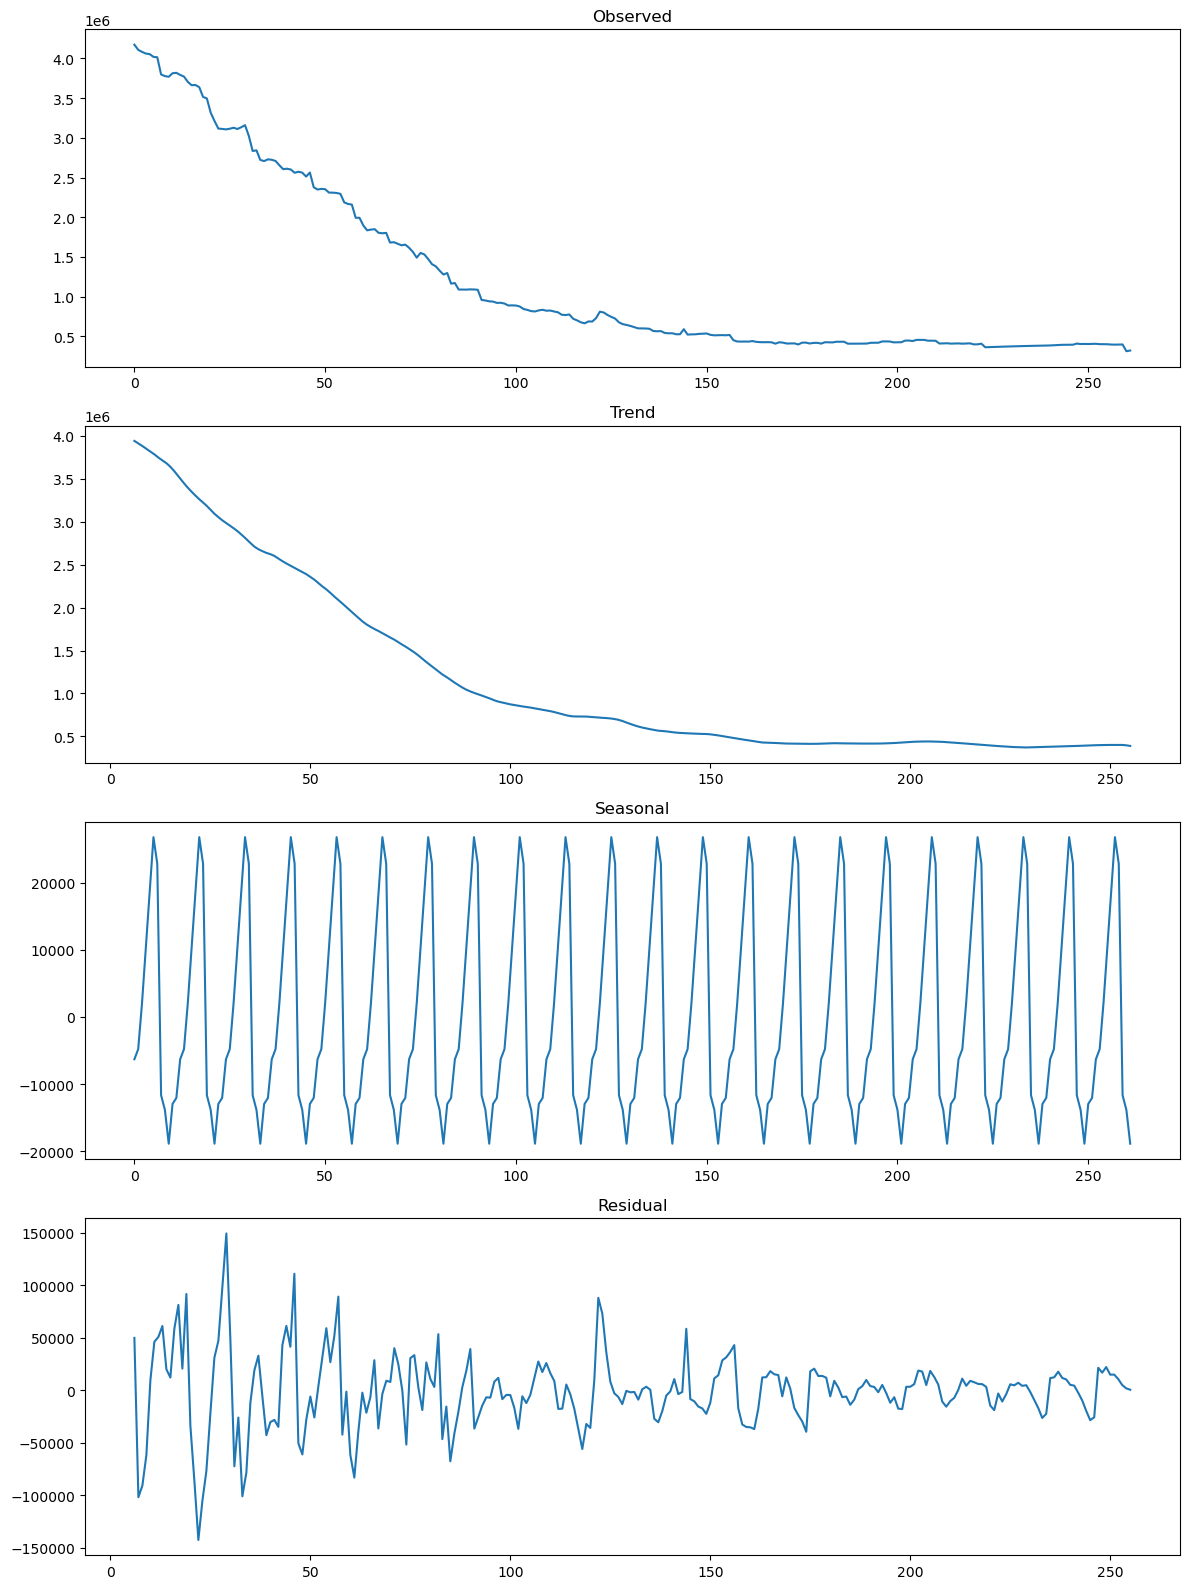

In [22]:
result_external = seasonal_decompose(df['External Debt'], model = 'additive', period = 12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
result_external.observed.plot(ax=ax1)
ax1.set_title('Observed')
result_external.trend.plot(ax=ax2)
ax2.set_title('Trend')
result_external.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result_external.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

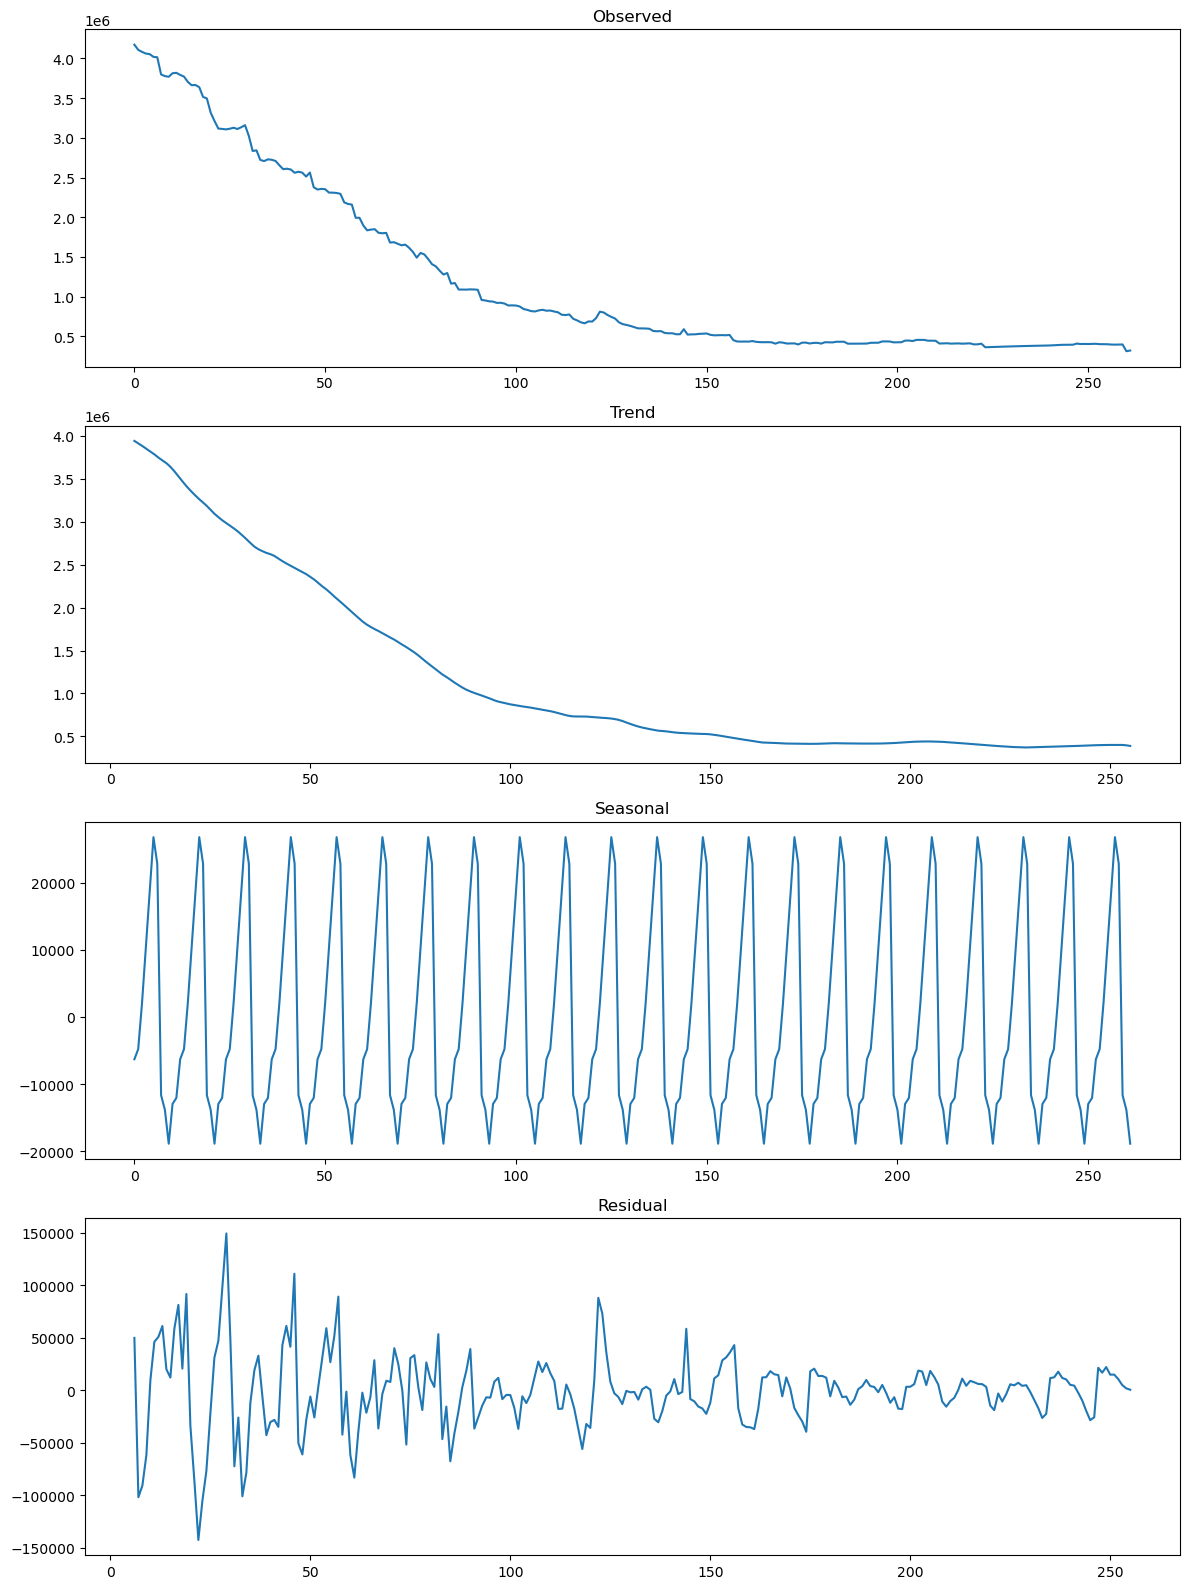

In [23]:
result_total = seasonal_decompose(df['External Debt'], model = 'additive', period = 12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
result_total.observed.plot(ax=ax1)
ax1.set_title('Observed')
result_total.trend.plot(ax=ax2)
ax2.set_title('Trend')
result_total.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result_total.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()